In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import datetime as dt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pylab import rcParams
sns.set_style("whitegrid", {'axes.grid' : True})


In [2]:
def get_uniq(df):
    print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
    for i in df.columns.to_list():
        print('\033[34m\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, 
                                                                            len(df[i].unique()))+'\033[0m')
        print(df[i].unique())
        print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m')


In [3]:
def get_nan(df):
    df_null = pd.concat([df.isna().sum().to_frame(name='count_missig_value'), 
           df.isna().mean().to_frame(name='pct_missig_value')], axis=1)
    df_null['pct_missig_value'] = np.round(df_null['pct_missig_value']*100, 2)
    print(df_null)
    



In [4]:
def get_types(df):
    for t in set(df.dtypes):
        print('\033[34m\033[1m' + "Переменные типа" + '\033[0m', t)
        print(df.select_dtypes(include = [t]).describe(), '\n')
        


In [5]:
df1 = pd.read_excel('Самостоятельное задание по аналитике данных от 2023 года.xlsx', sheet_name='Продажи')
df2 = pd.read_excel('Самостоятельное задание по аналитике данных от 2023 года.xlsx', sheet_name='Каналы привлечения')
df3 = pd.read_excel('Самостоятельное задание по аналитике данных от 2023 года.xlsx', sheet_name='Города')
df1['Маржа'] = df1['Покупка']-df1['Себестоимость корзины']
df1


,Дата,Канал привлечения (код),Город (код),Себестоимость корзины,Покупка,Маржа
0,2022-01-01,5,843,13608.00,18900,5292.00
1,2022-01-01,6,812,1137.50,1300,162.50
2,2022-01-01,6,391,76.00,80,4.00
3,2022-01-01,4,342,386.40,420,33.60
4,2022-01-01,8,351,791.20,860,68.80
...,...,...,...,...,...,...
1998,2022-12-12,3,351,3382.25,4150,767.75
1999,2022-12-12,1,351,6339.50,8180,1840.50
2000,2022-12-12,2,863,10130.40,14070,3939.60
2001,2022-12-12,10,861,997.50,1140,142.50


In [6]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Дата                     2003 non-null   datetime64[ns]
 1   Канал привлечения (код)  2003 non-null   int64         
 2   Город (код)              2003 non-null   int64         
 3   Себестоимость корзины    2003 non-null   float64       
 4   Покупка                  2003 non-null   int64         
 5   Маржа                    2003 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 94.0 KB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Код                10 non-null     int64 
 1   Канал привлечения  10 non-null     object
 2   Бюджет             10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Город       16 non-null     object
 1   Код города  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


In [9]:
get_nan(df1)

                         count_missig_value  pct_missig_value
Дата                                      0               0.0
Канал привлечения (код)                   0               0.0
Город (код)                               0               0.0
Себестоимость корзины                     0               0.0
Покупка                                   0               0.0
Маржа                                     0               0.0


In [10]:
get_nan(df2)

                   count_missig_value  pct_missig_value
Код                                 0               0.0
Канал привлечения                   0               0.0
Бюджет                              0               0.0


In [11]:
get_nan(df3)

            count_missig_value  pct_missig_value
Город                        0               0.0
Код города                   0               0.0


In [12]:
get_uniq(df2)

Уникальные значения

Признак Код имеет 10 следующих уникальных значений:
[ 1  2  3  4  5  6  7  8  9 10]
---------------------------------------------------------------------------------
Признак Канал привлечения имеет 10 следующих уникальных значений:
['Реклама Яндекс' 'Реклама Mail ru' 'Соц сеть VK' 'Соц сеть Одноклассники'
 'Соц сеть YouTube' 'SMS рассылка' 'Партнёрка 1' 'Партнёрка 2'
 'Партнёрка 3' 'Партнёрка 4']
---------------------------------------------------------------------------------
Признак Бюджет имеет 9 следующих уникальных значений:
[152500 165000 100000 235100 155000 111240 125000 350000 187500]
---------------------------------------------------------------------------------


In [13]:
get_uniq(df3)

Уникальные значения

Признак Город имеет 16 следующих уникальных значений:
['Москва' 'Санкт-Петербург' 'Новосибирск' 'Екатеринбург' 'Казань'
 'Нижний Новгород' 'Челябинск' 'Красноярск' 'Самара' 'Уфа'
 'Ростов-на-Дону' 'Омск' 'Краснодар' 'Воронеж' 'Волгоград' 'Пермь']
---------------------------------------------------------------------------------
Признак Код города имеет 16 следующих уникальных значений:
[495 812 383 343 843 831 351 391 846 347 863 381 861 473 844 342]
---------------------------------------------------------------------------------


In [14]:
df1.duplicated().sum()


1

In [15]:
df1 = df1.drop_duplicates()
df1.duplicated().sum()


0

In [16]:
df4 = df1.merge(df2, how='left', left_on='Канал привлечения (код)', right_on='Код') \
            .sort_values(['Покупка'], ascending=False).reset_index() \
.drop(columns=['Код','index']).rename(columns={'Покупка':"Выручка"})
df4


,Дата,Канал привлечения (код),Город (код),Себестоимость корзины,Выручка,Маржа,Канал привлечения,Бюджет
0,2022-03-12,4,347,128359.0,183370,55011.0,Соц сеть Одноклассники,235100
1,2022-05-12,9,473,73780.0,105400,31620.0,Партнёрка 3,350000
2,2022-07-04,2,351,61635.0,88050,26415.0,Реклама Mail ru,165000
3,2022-10-06,8,383,57169.0,81670,24501.0,Партнёрка 2,125000
4,2022-09-07,3,381,42882.0,61260,18378.0,Соц сеть VK,100000
...,...,...,...,...,...,...,...,...
1997,2022-08-08,8,846,9.5,10,0.5,Партнёрка 2,125000
1998,2022-08-08,2,844,9.5,10,0.5,Реклама Mail ru,165000
1999,2022-08-12,6,342,9.5,10,0.5,SMS рассылка,111240
2000,2022-01-09,5,846,9.5,10,0.5,Соц сеть YouTube,155000


In [17]:
df5 = df4.merge(df3, how='left', left_on='Город (код)', right_on='Код города') \
            .sort_values(['Выручка'], ascending=False).drop(columns=['Код города']).reset_index()\
.drop(columns=['index'])
df5['Месяц'] = df5['Дата'].dt.month
df5['Год'] = df5['Дата'].dt.year
df5


,Дата,Канал привлечения (код),Город (код),Себестоимость корзины,Выручка,Маржа,Канал привлечения,Бюджет,Город,Месяц,Год
0,2022-03-12,4,347,128359.0,183370,55011.0,Соц сеть Одноклассники,235100,Уфа,3,2022
1,2022-05-12,9,473,73780.0,105400,31620.0,Партнёрка 3,350000,Воронеж,5,2022
2,2022-07-04,2,351,61635.0,88050,26415.0,Реклама Mail ru,165000,Челябинск,7,2022
3,2022-10-06,8,383,57169.0,81670,24501.0,Партнёрка 2,125000,Новосибирск,10,2022
4,2022-09-07,3,381,42882.0,61260,18378.0,Соц сеть VK,100000,Омск,9,2022
...,...,...,...,...,...,...,...,...,...,...,...
1997,2022-08-08,8,846,9.5,10,0.5,Партнёрка 2,125000,Самара,8,2022
1998,2022-08-08,2,844,9.5,10,0.5,Реклама Mail ru,165000,Волгоград,8,2022
1999,2022-08-12,6,342,9.5,10,0.5,SMS рассылка,111240,Пермь,8,2022
2000,2022-01-09,5,846,9.5,10,0.5,Соц сеть YouTube,155000,Самара,1,2022


### 1.    Делаем календарь – сводную таблицу: 
a.        Выручку по месяцам/по каналам привлечения, 
b.        маржу по месяцам/по каналам привлечения, 
c.        выручку по месяцам/по городам, и
d.        выручку по городам/по каналам привлечения.


In [18]:
df1_a = df5.pivot_table(index='Канал привлечения', columns='Месяц',
values='Выручка', aggfunc='sum')
df1_a


Месяц,1,2,3,4,5,6,7,8,9,10,11,12
Канал привлечения,,,,,,,,,,,,
SMS рассылка,83190,87930,55200,54010,122570,69640,51460,126140,66160,61100,37800,45520
Партнёрка 1,39690,47100,39060,104580,41500,41860,82310,66490,45320,71420,80690,117980
Партнёрка 2,48200,76440,20560,90960,39580,99110,35240,39190,61010,113980,82780,49490
Партнёрка 3,53100,41310,87770,69510,179920,25240,112880,26790,42920,89420,145550,30290
Партнёрка 4,21000,65930,23160,88900,154520,50130,64240,51410,77870,85870,132550,104520
Реклама Mail ru,137660,43400,50660,48610,115140,48360,183250,16200,74440,32060,90020,71950
Реклама Яндекс,107750,78760,152830,55810,81430,82540,58070,91060,160650,55850,50130,102270
Соц сеть VK,39820,59690,33890,84790,61950,50640,113270,88990,126380,189810,131540,128450
Соц сеть YouTube,102120,82530,53400,28220,59250,44170,9870,22410,37690,8490,32880,36280


#### Строим HeatMaps.

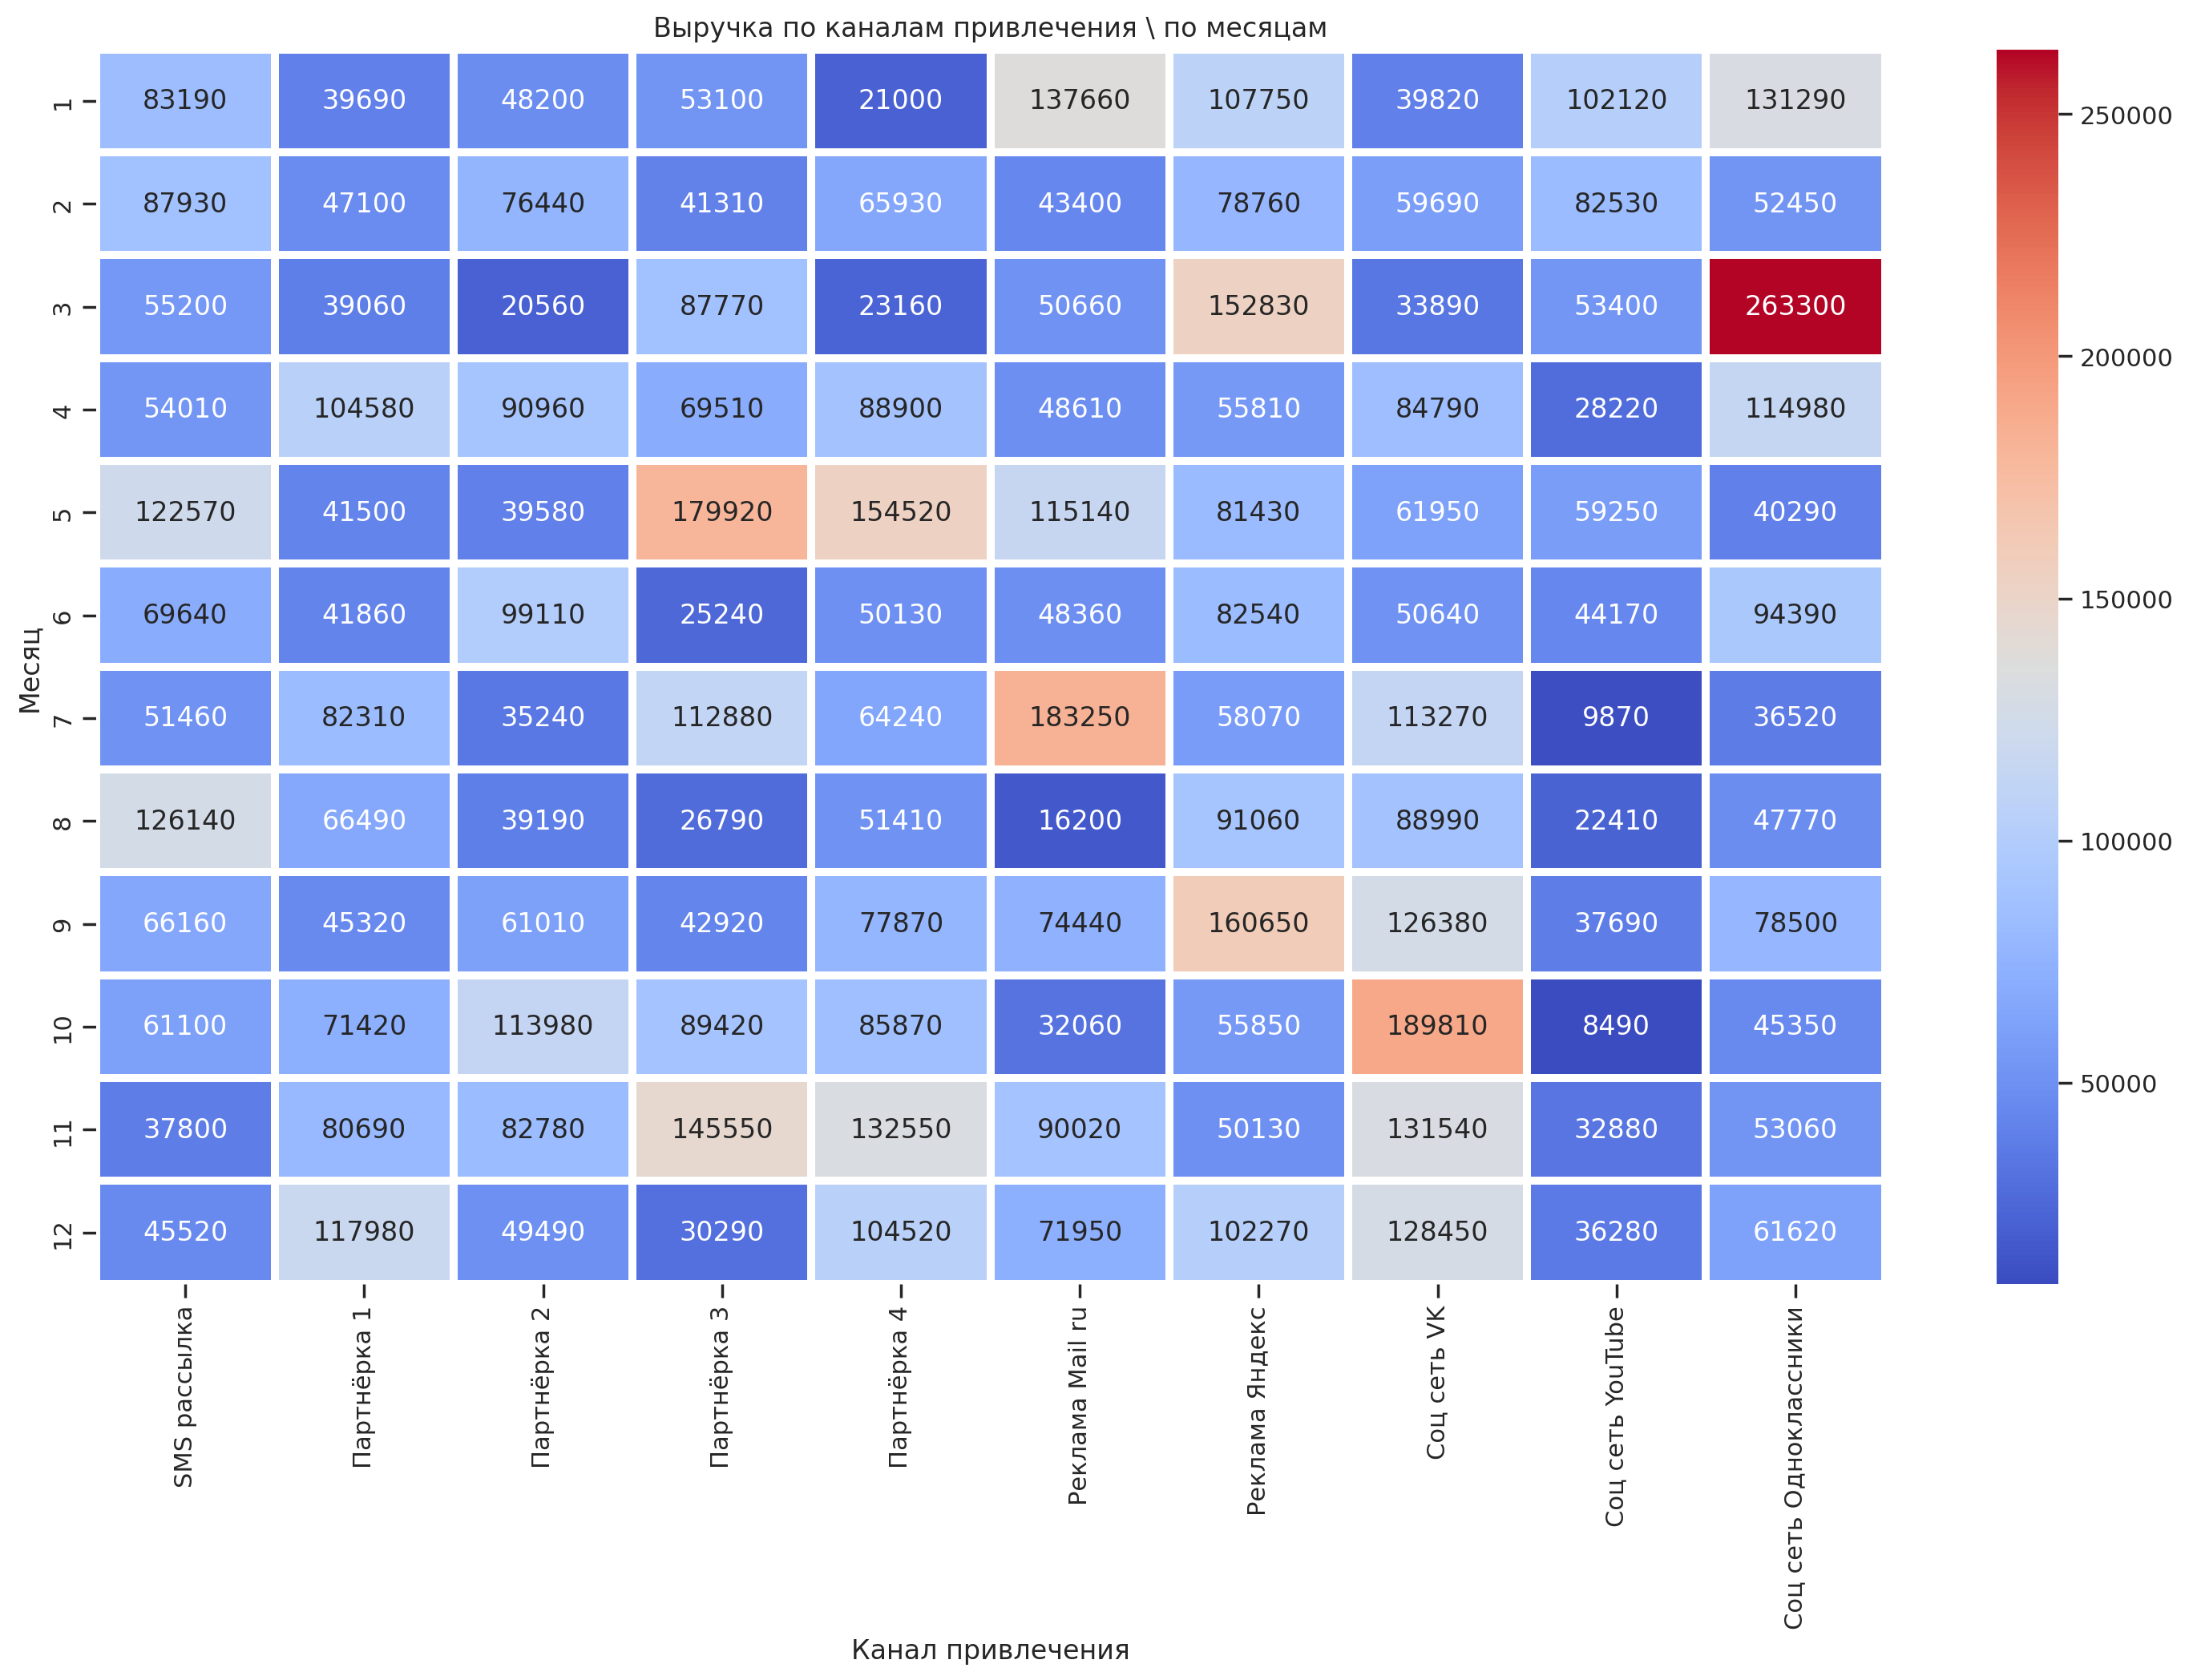

In [19]:
sns.set(style='ticks')
plt.figure(figsize=(18, 10))
plt.title('Выручка по каналам привлечения \ по месяцам')
sns.heatmap(df1_a.T, mask=df1_a.T.isnull(), annot=True, cmap="coolwarm", 
            linewidths=3, linecolor='white', fmt = '.0f');


In [20]:
df1_b = df5.pivot_table(index='Канал привлечения', columns='Месяц',
values='Маржа', aggfunc='sum')
df1_b


Месяц,1,2,3,4,5,6,7,8,9,10,11,12
Канал привлечения,,,,,,,,,,,,
SMS рассылка,19902.10,19947.85,11164.55,12037.30,30389.35,17022.55,12455.10,32216.30,15558.25,15154.45,8948.05,11457.80
Партнёрка 1,8533.80,9777.70,7417.15,24635.00,9478.15,8460.90,19379.75,15084.20,9497.90,18327.70,18812.85,30032.65
Партнёрка 2,11462.25,17511.55,3664.30,20708.65,8594.10,26227.25,6640.45,7346.80,13529.75,30947.60,17537.65,10920.85
Партнёрка 3,12970.95,9843.05,20944.70,15324.60,47048.95,4134.80,28529.80,4102.35,9737.10,22177.80,37387.35,6566.35
Партнёрка 4,4052.85,14520.30,4161.60,23400.95,38108.85,12349.85,15329.50,11441.45,18009.05,20414.95,32949.00,25091.50
Реклама Mail ru,34578.45,7887.75,10120.35,11187.25,29643.65,10357.30,50760.05,2544.65,18397.20,6518.95,21871.15,17511.15
Реклама Яндекс,27526.55,20409.30,40755.50,13033.85,19796.10,20561.95,13750.30,23346.40,40702.85,12346.10,10965.30,25949.85
Соц сеть VK,9337.30,14143.55,5291.20,21681.85,15077.90,12795.60,27052.45,21213.75,32708.45,48209.85,33633.75,30106.35
Соц сеть YouTube,24848.50,20249.75,11260.65,5482.95,13704.30,10732.35,1683.60,5237.15,9205.15,1710.15,8246.40,8518.85


#### Строим HeatMaps.

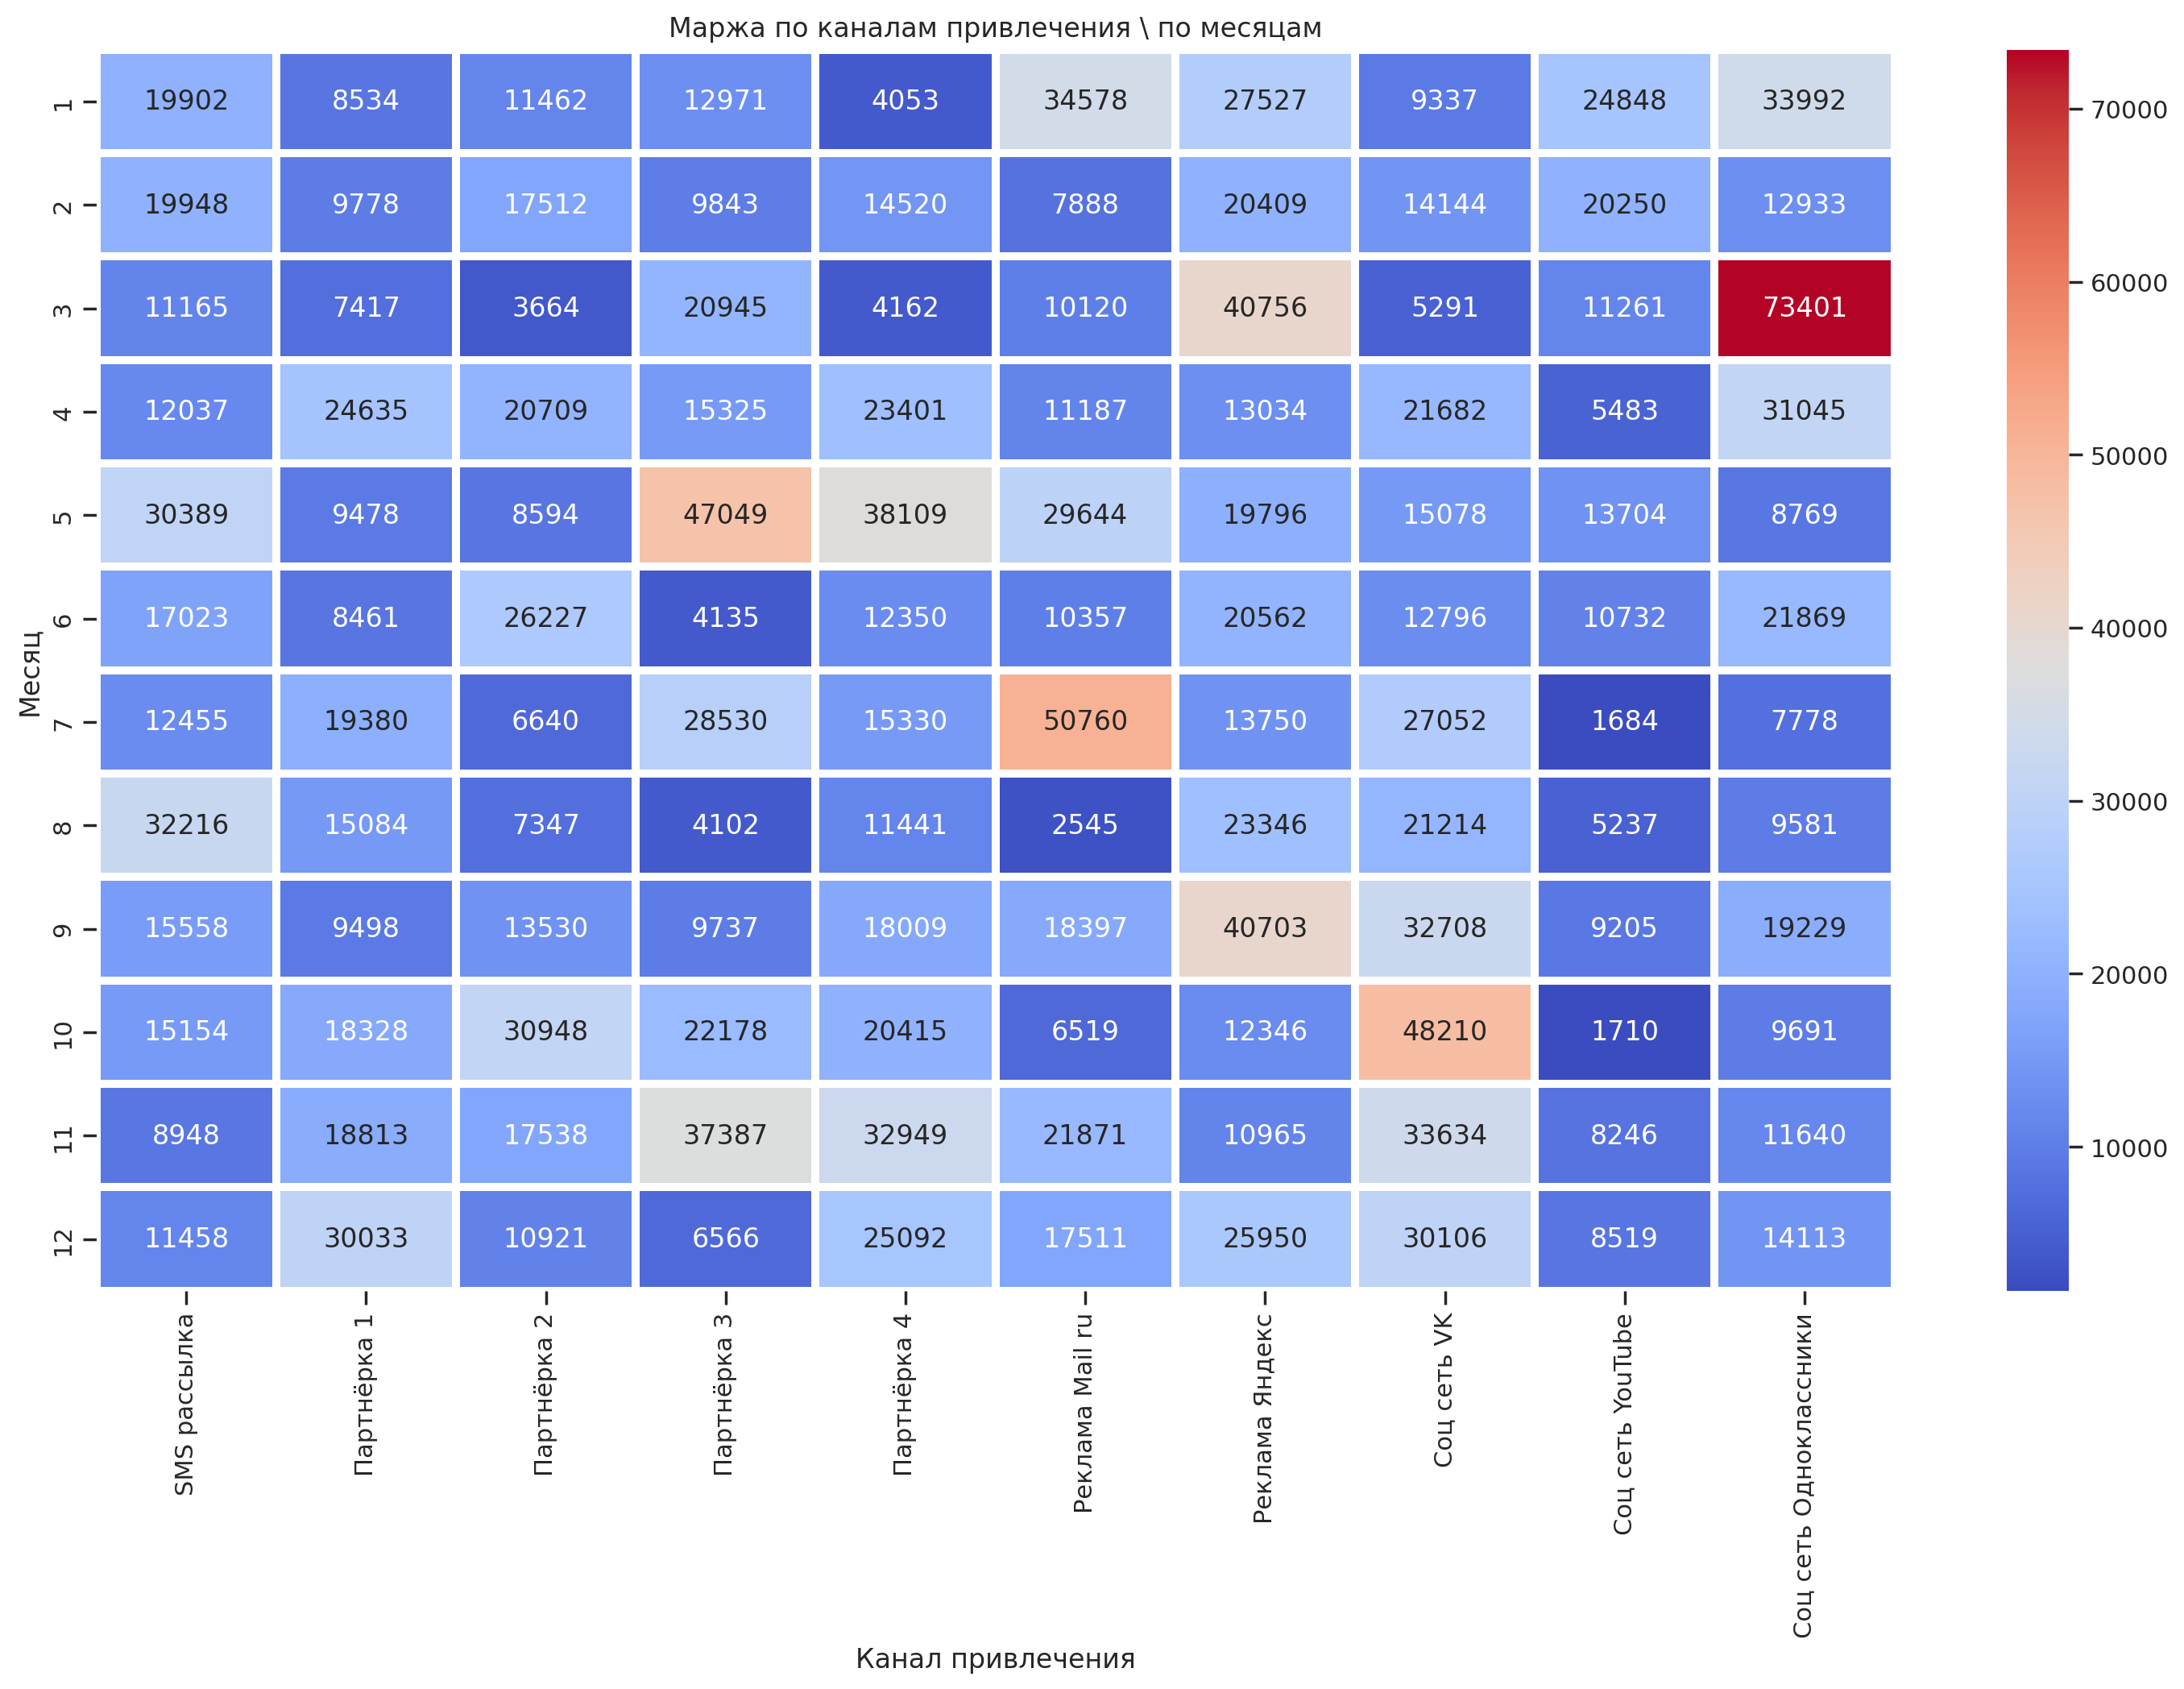

In [21]:
sns.set(style='ticks')
plt.figure(figsize=(18, 10))
plt.title('Маржа по каналам привлечения \ по месяцам')
sns.heatmap(df1_b.T, mask=df1_b.T.isnull(), annot=True, cmap="coolwarm", 
            linewidths=3, linecolor='white', fmt = '.0f');


In [22]:
df1_c = df5.pivot_table(index='Город', columns='Месяц',
values='Выручка', aggfunc='sum')
df1_c


Месяц,1,2,3,4,5,6,7,8,9,10,11,12
Город,,,,,,,,,,,,
Волгоград,82310,37250,35620,188890,55420,34940,64640,28430,21630,34760,76770,67610
Воронеж,46890,17740,13970,12390,119480,24590,17410,86650,69870,2020,34060,7560
Екатеринбург,21200,17180,52080,11980,13150,72850,15680,38160,52680,27910,34710,44080
Казань,69520,19530,23670,12230,61350,17400,55950,30430,34550,25510,76620,22730
Краснодар,10050,94860,41620,56820,24600,15940,9880,38720,50910,87360,19610,24650
Красноярск,83290,44950,19240,47610,112240,19920,37390,13050,43940,42520,12450,59560
Москва,46730,41630,87950,54810,63230,26070,69760,51370,18150,51180,52780,58890
Нижний Новгород,77360,7950,20800,53050,70130,8980,41200,63940,49360,20130,66130,33570
Новосибирск,24140,41500,62370,39330,56860,88720,41690,11470,64790,195500,60090,35460


#### Строим HeatMaps.

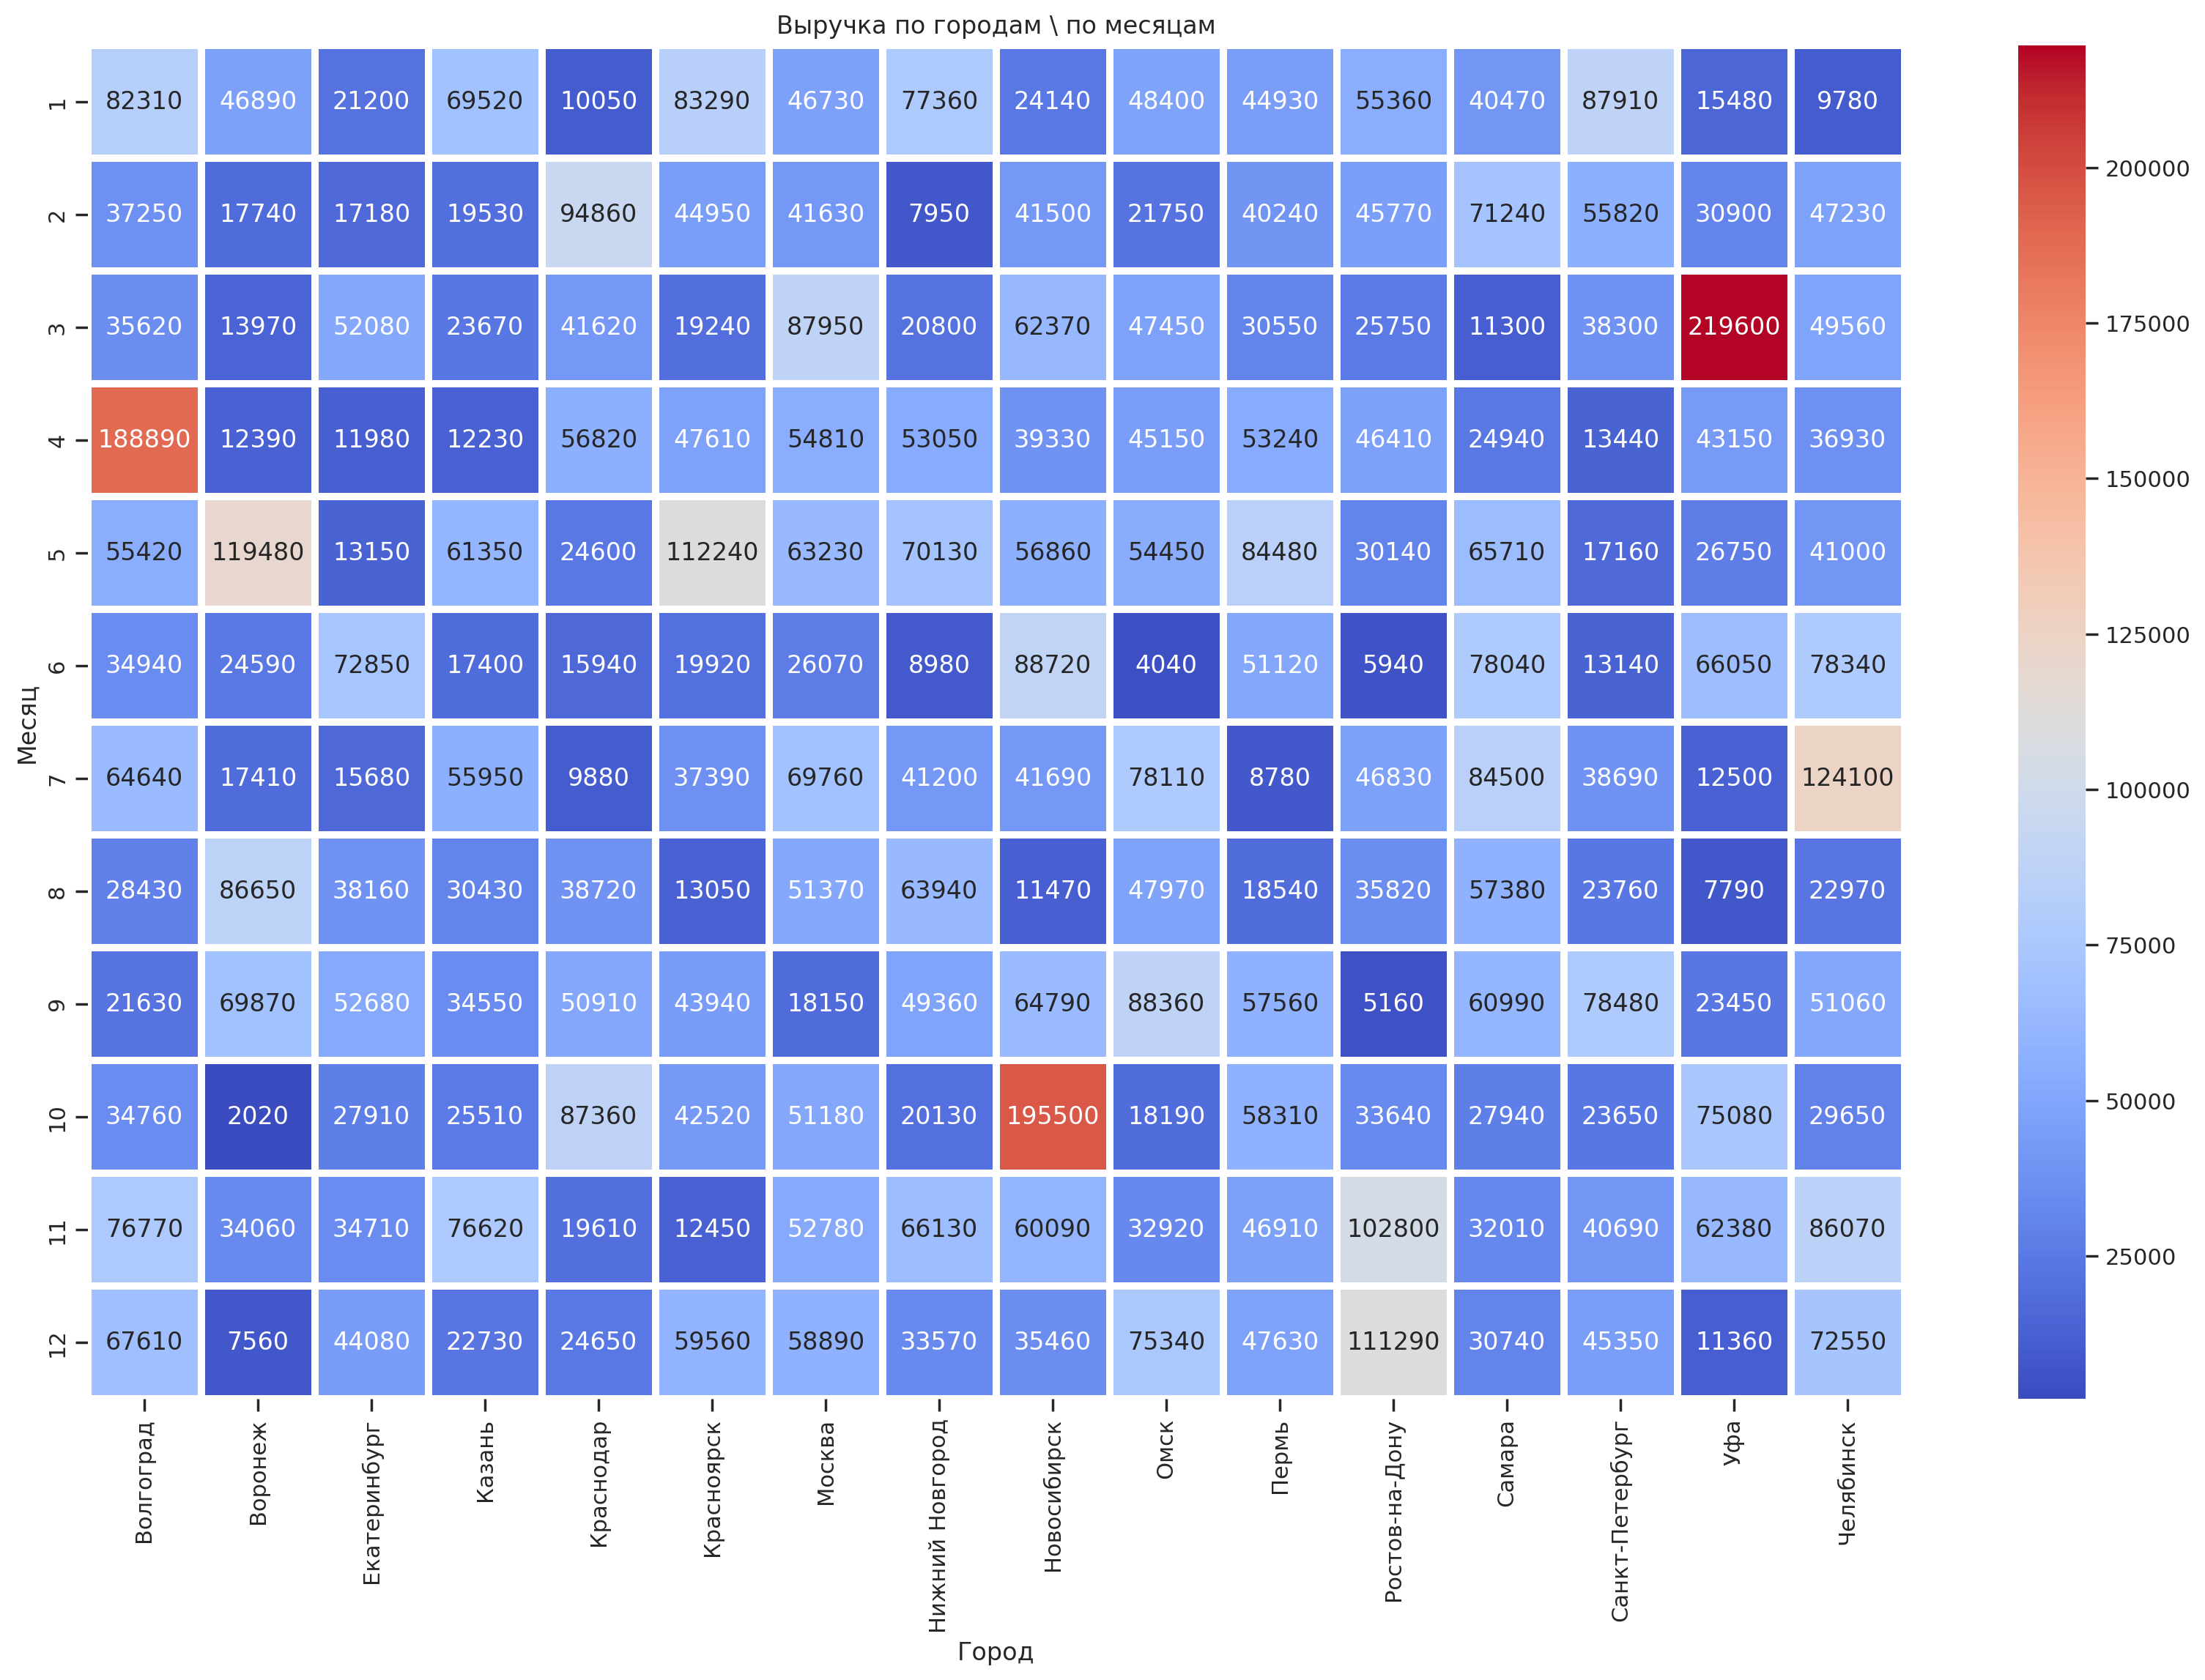

In [23]:
sns.set(style='ticks')
plt.figure(figsize=(20, 12))
plt.title('Выручка по городам \ по месяцам')
sns.heatmap(df1_c.T, mask=df1_c.T.isnull(), annot=True, cmap="coolwarm", 
            linewidths=3, linecolor='white',fmt = '.0f');


In [24]:
df1_d = df5.pivot_table(index='Город', columns='Канал привлечения',
values='Выручка', aggfunc='sum')
df1_d


Канал привлечения,SMS рассылка,Партнёрка 1,Партнёрка 2,Партнёрка 3,Партнёрка 4,Реклама Mail ru,Реклама Яндекс,Соц сеть VK,Соц сеть YouTube,Соц сеть Одноклассники
Город,,,,,,,,,,
Волгоград,76190,20920,56160,53330,58560,111570,60950,128290,53520,108780
Воронеж,47100,51750,27870,126900,11620,38720,87040,26090,20760,14780
Екатеринбург,17090,41570,21710,10300,59530,34210,62780,32140,22910,99420
Казань,51450,50020,20000,14840,33370,58100,20460,96250,38550,66450
Краснодар,40030,44650,29810,66110,36460,17120,56370,58070,65990,60410
Красноярск,94520,63740,20470,45750,54170,30670,60170,60150,65840,40680
Москва,15070,79180,39350,71260,102490,48080,120170,57580,22450,66920
Нижний Новгород,29820,47520,35520,28130,62990,61880,129890,37690,31130,48030
Новосибирск,149750,82330,114940,38180,22730,100030,31820,115290,29640,37210


#### Строим HeatMaps.

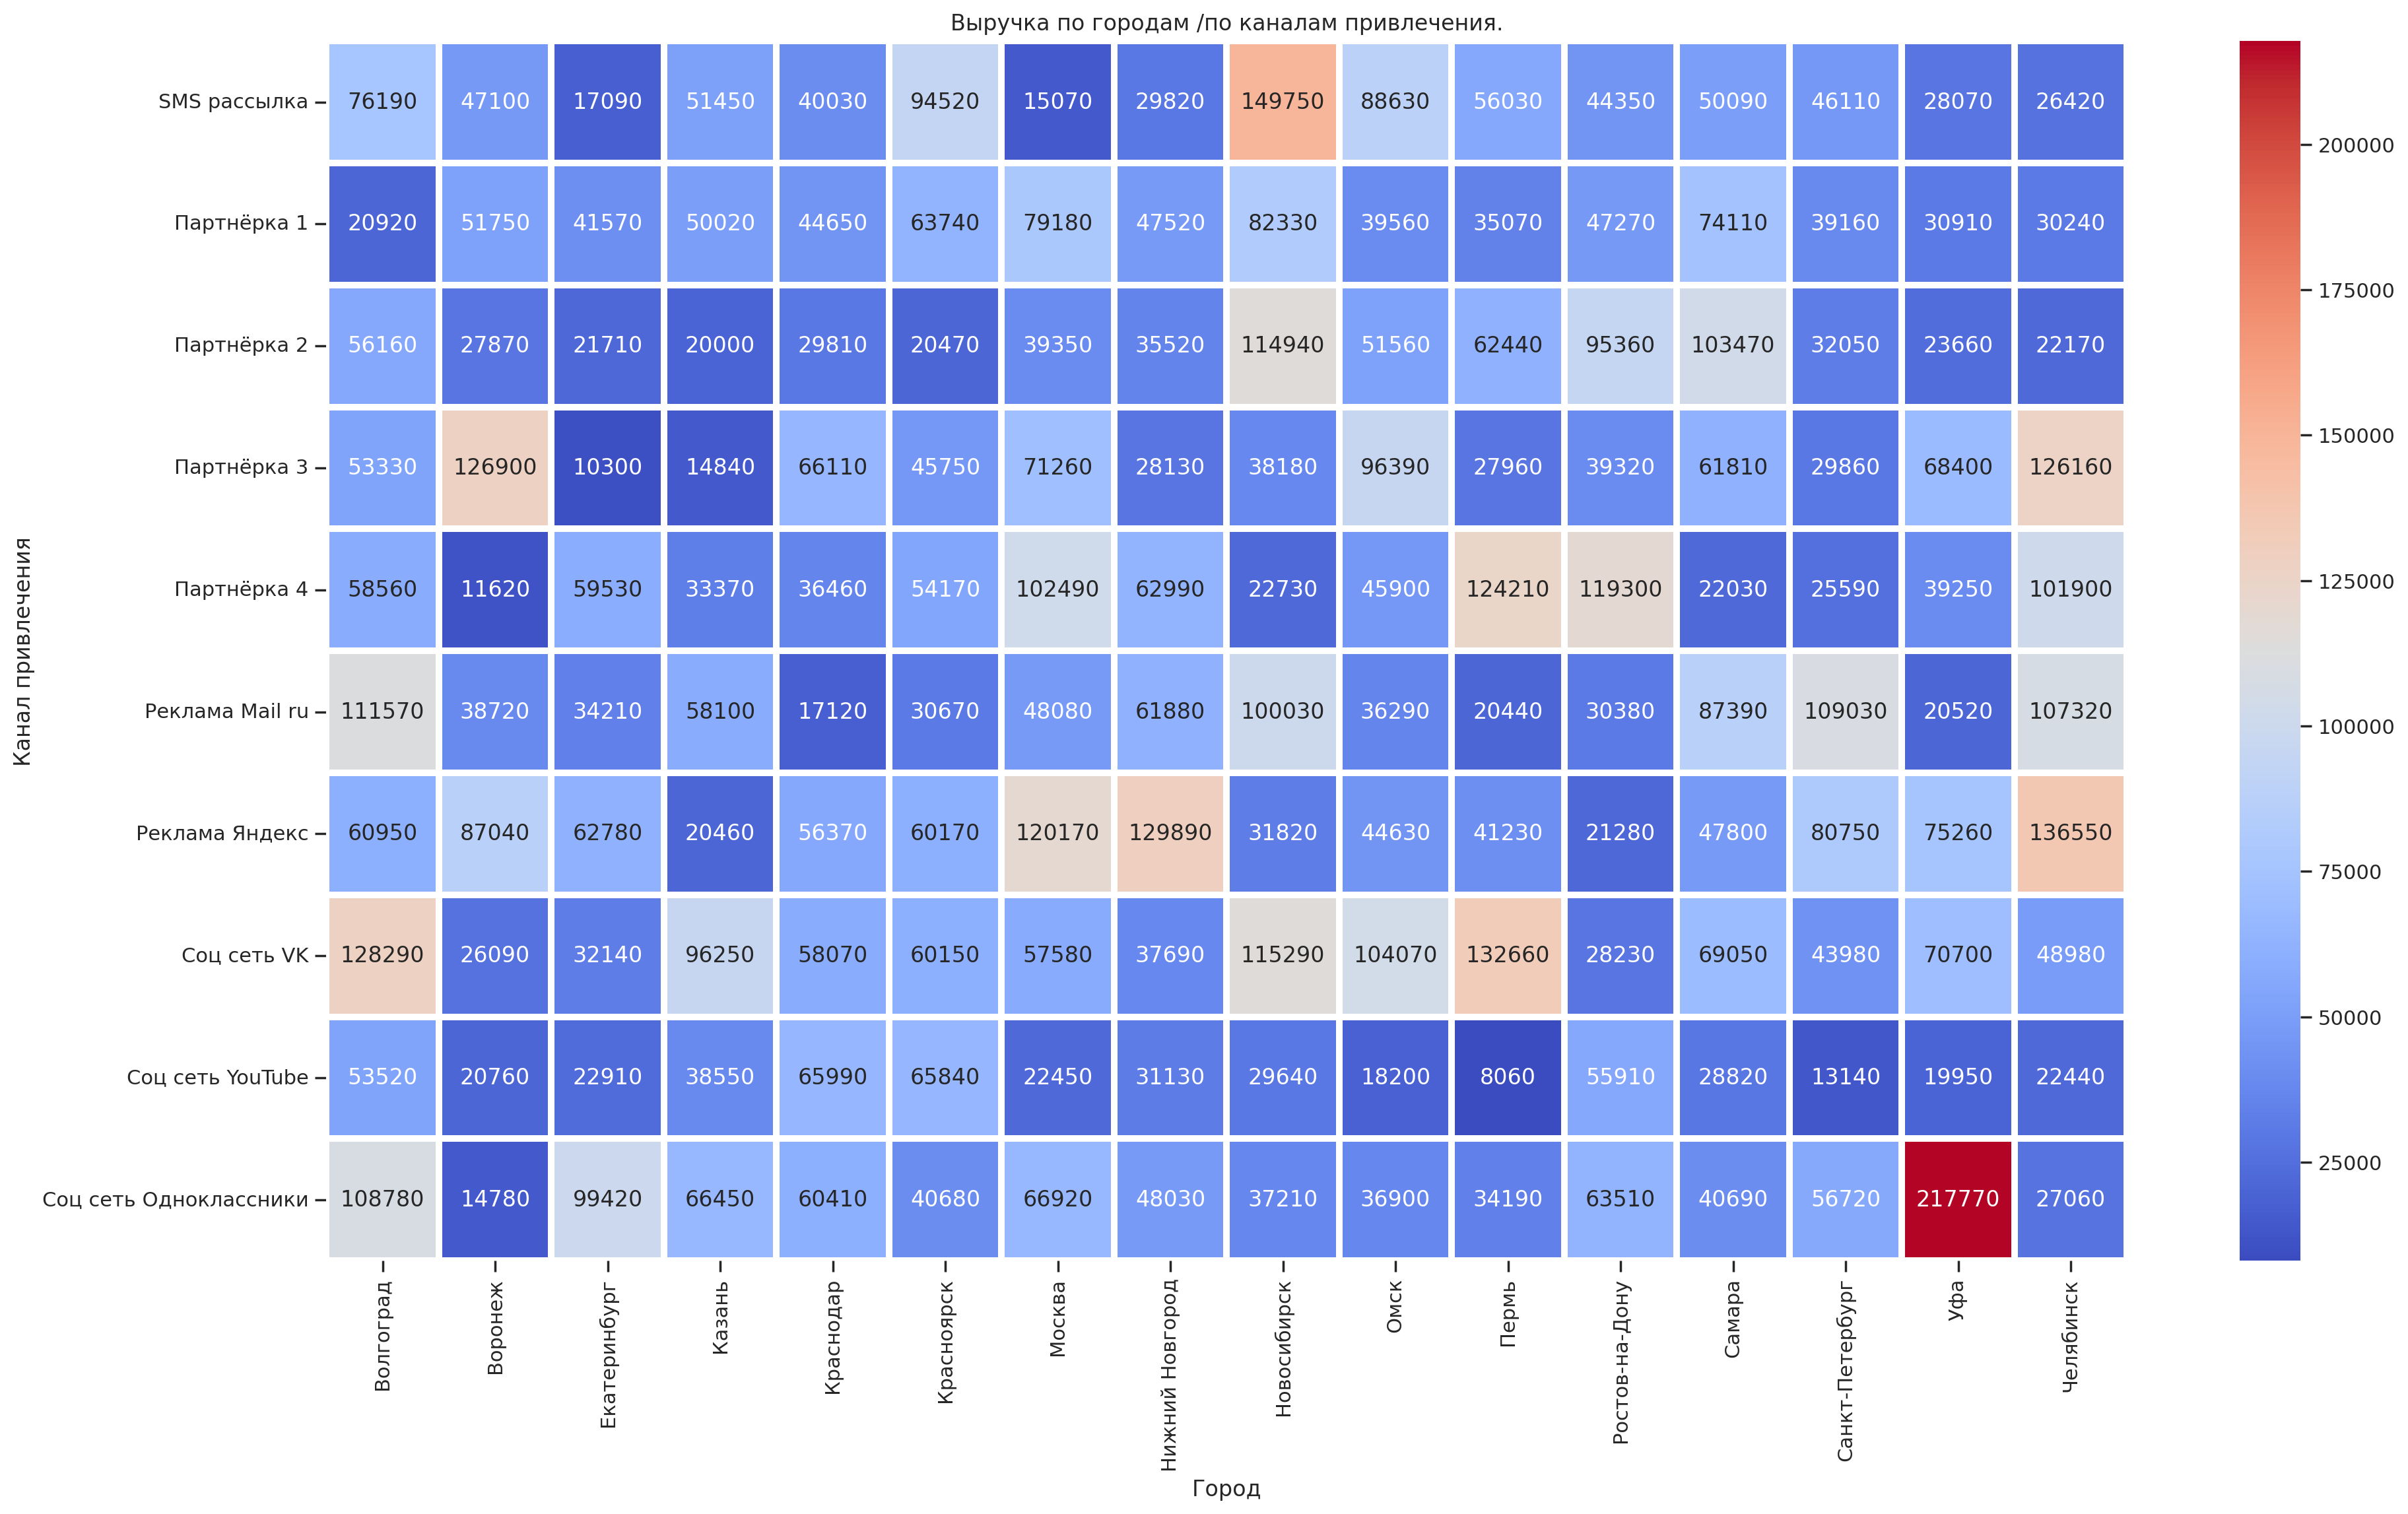

In [25]:
sns.set(style='ticks')
plt.figure(figsize=(22, 12))
plt.title('Выручка по городам /по каналам привлечения.')
sns.heatmap(df1_d.T, mask=df1_d.T.isnull(), annot=True, cmap="coolwarm", linewidths=3, 
            linecolor='white',fmt = '.0f');


### 2.        Необходимо рассчитать интересующие нас бизнес-показатели
a.        Маржа = выручка (покупка) – себестоимость корзины
b.        ROMI по каждому каналу привлечения = (маржа по данному каналу привлечения – маркетинговый бюджет по каналу) / маркетинговый бюджет х 100%.

In [26]:
df2_a=df2.sort_values(by="Канал привлечения", ascending=True).drop(columns=['Код']).reset_index()\
.drop(columns=['index'])
df2_a

,Канал привлечения,Бюджет
0,SMS рассылка,111240
1,Партнёрка 1,100000
2,Партнёрка 2,125000
3,Партнёрка 3,350000
4,Партнёрка 4,187500
5,Реклама Mail ru,165000
6,Реклама Яндекс,152500
7,Соц сеть VK,100000
8,Соц сеть YouTube,155000
9,Соц сеть Одноклассники,235100


In [27]:
df2_b = df5[['Канал привлечения', 'Маржа']].groupby('Канал привлечения').sum().reset_index()\
.sort_values(by="Канал привлечения", ascending=True)
df2_b


,Канал привлечения,Маржа
0,SMS рассылка,206253.65
1,Партнёрка 1,179437.75
2,Партнёрка 2,175091.20
3,Партнёрка 3,218767.80
4,Партнёрка 4,219829.85
5,Реклама Mail ru,221377.90
6,Реклама Яндекс,269144.05
7,Соц сеть VK,271252.00
8,Соц сеть YouTube,120879.80
9,Соц сеть Одноклассники,254042.00


In [28]:
df6 = df2_a.merge(df2_b, how='left', left_on='Канал привлечения', right_on='Канал привлечения')
df6['ROMI'] = (df6['Маржа']-df6['Бюджет'])/df6['Бюджет']*100
df6


,Канал привлечения,Бюджет,Маржа,ROMI
0,SMS рассылка,111240,206253.65,85.413206
1,Партнёрка 1,100000,179437.75,79.437750
2,Партнёрка 2,125000,175091.20,40.072960
3,Партнёрка 3,350000,218767.80,-37.494914
4,Партнёрка 4,187500,219829.85,17.242587
5,Реклама Mail ru,165000,221377.90,34.168424
6,Реклама Яндекс,152500,269144.05,76.487902
7,Соц сеть VK,100000,271252.00,171.252000
8,Соц сеть YouTube,155000,120879.80,-22.013032
9,Соц сеть Одноклассники,235100,254042.00,8.056997


### 3.    Визуализируем результаты:
a.        Строим график распределения выручки и маржи по месяцам.
b.        Строим график, в котором отражаем каналы привлечения на основе их ROMI.
c.        Строим график распределения выручки и маржи по месяцам.

In [29]:
df3_a = df5[['Месяц', 'Выручка',"Маржа"]].groupby("Месяц").sum().sort_values(by="Месяц", ascending=True) \
            .reset_index()
df3_a


,Месяц,Выручка,Маржа
0,1,763820,187204.55
1,2,635540,147223.35
2,3,779830,188181.40
3,4,740370,178537.75
4,5,896150,220610.00
5,6,606080,144511.55
6,7,747110,183358.85
7,8,576450,132114.25
8,9,770940,186575.05
9,10,753350,185498.95


### График распределения выручки и маржи по месяцам.

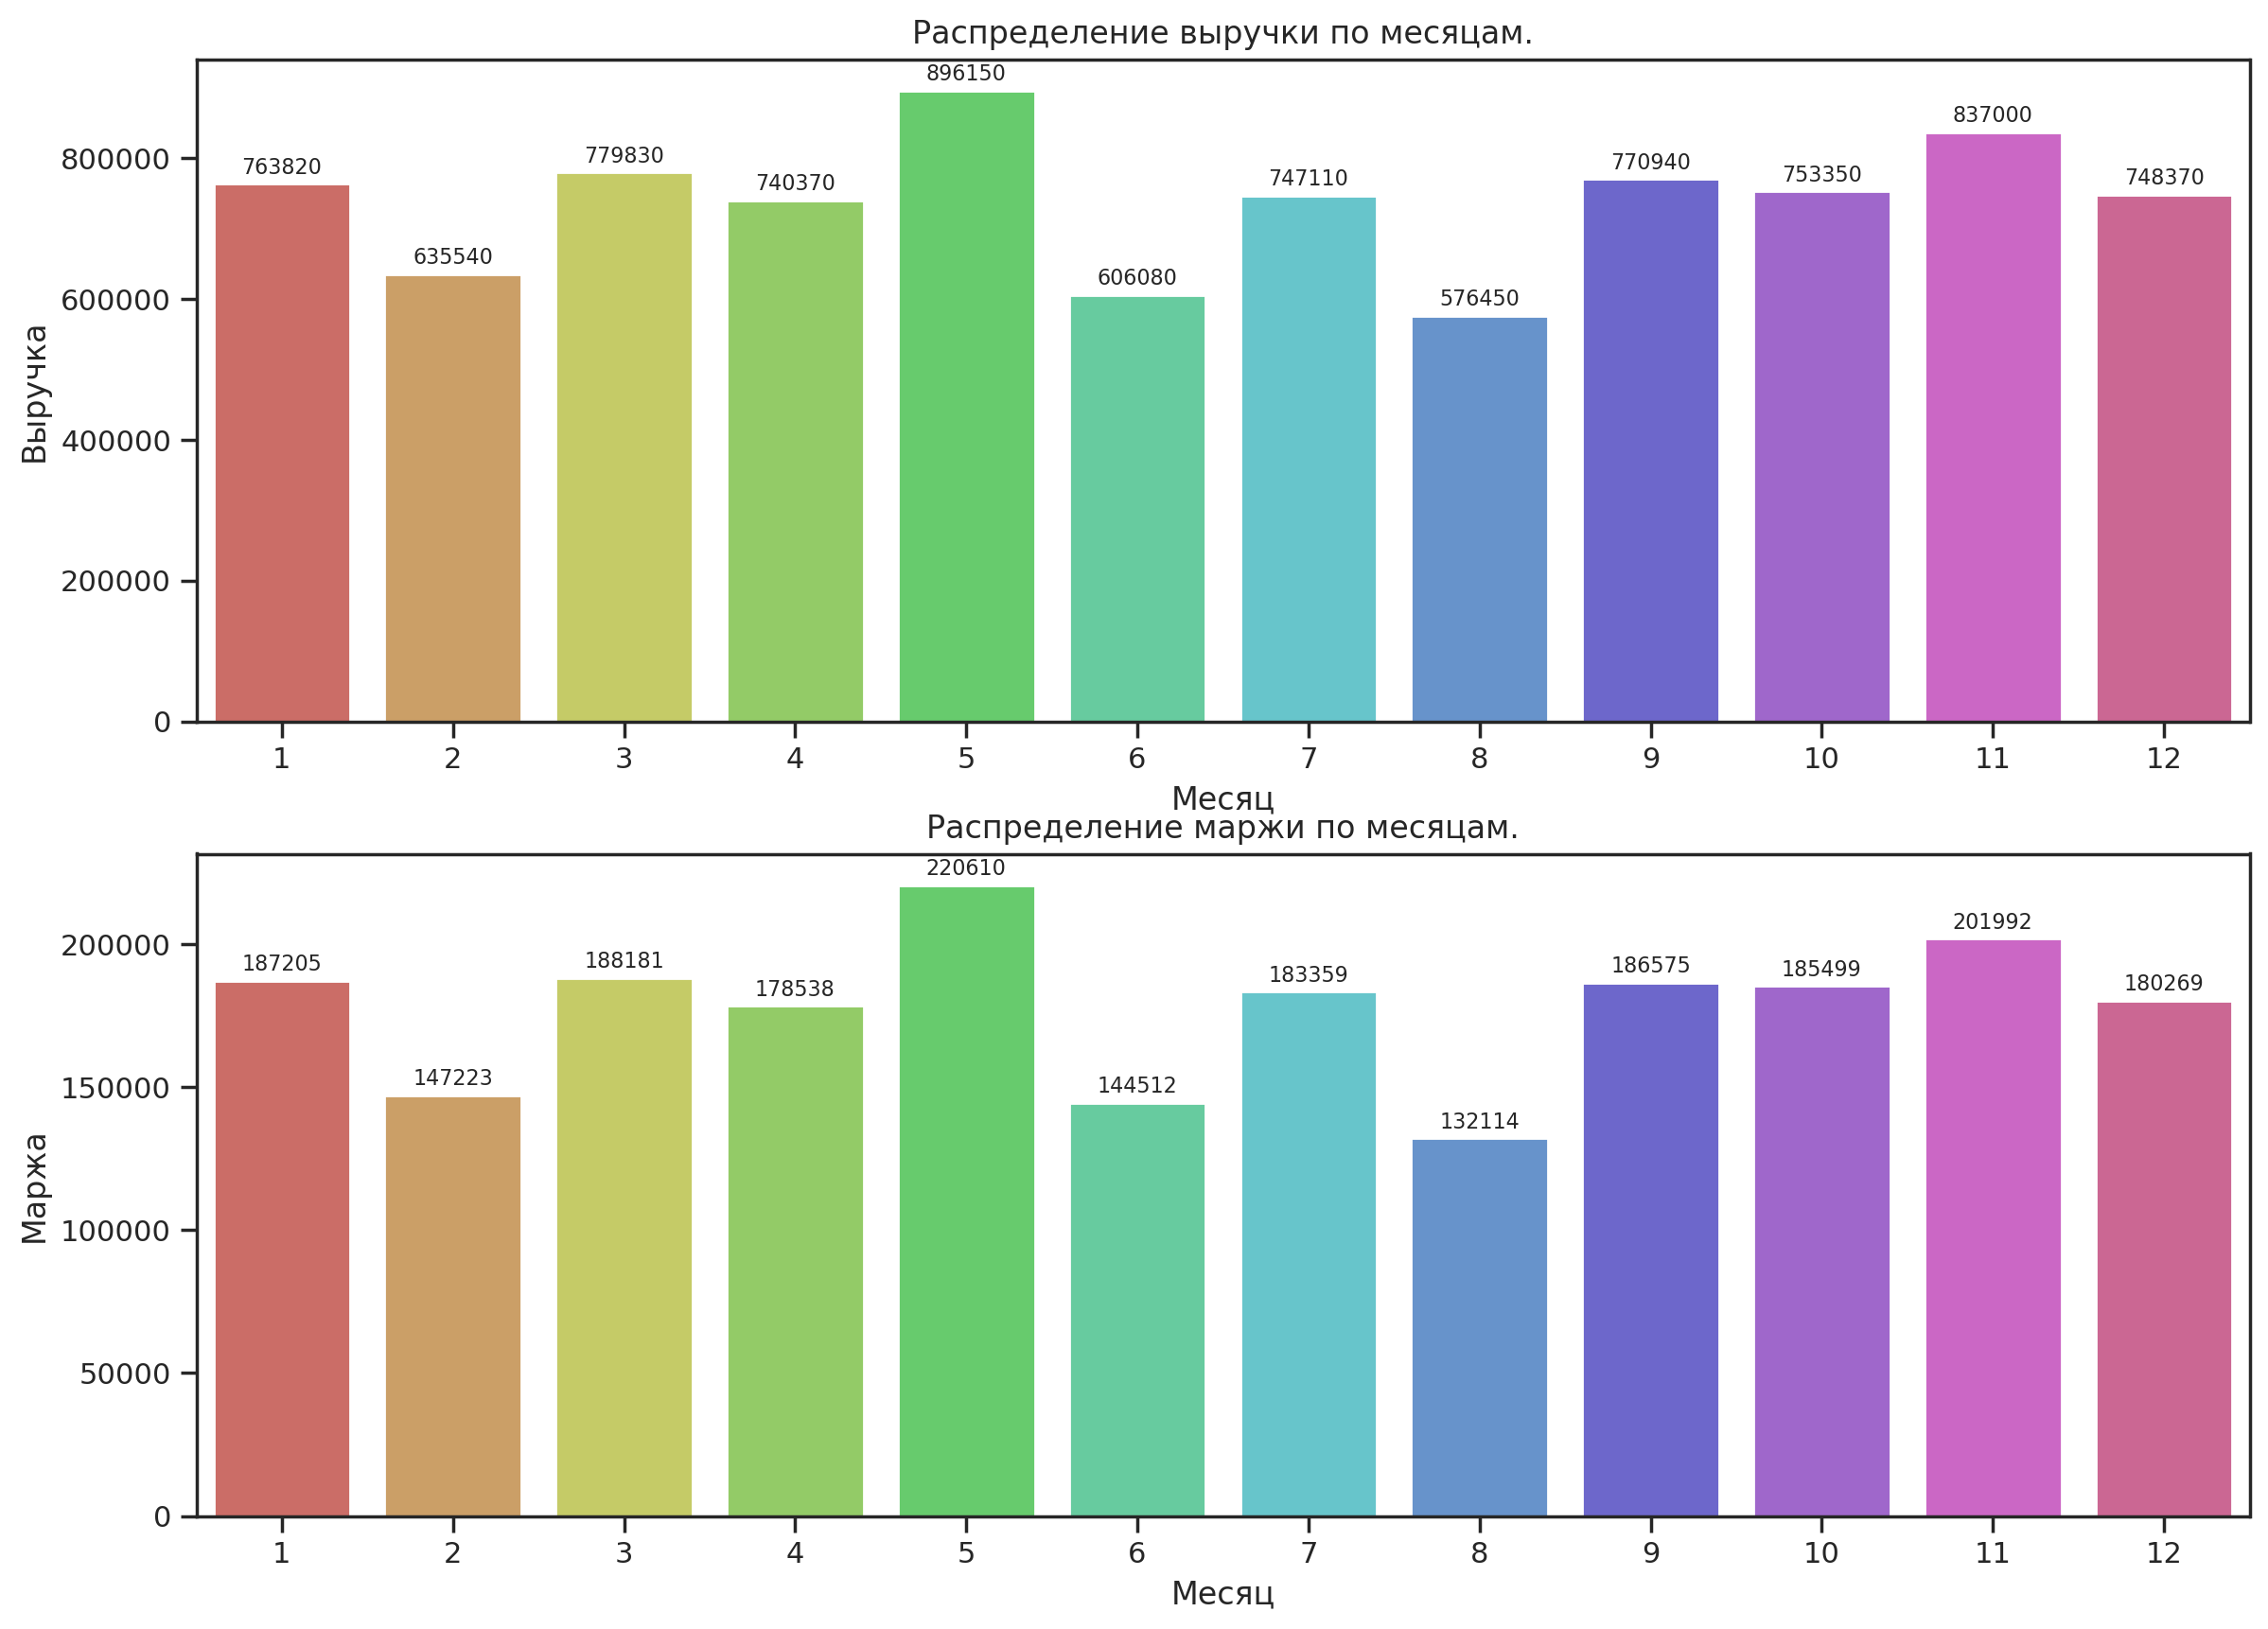

In [30]:
df10=df3_a
fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(14,10))
ax1 = sns.barplot(data=df10, x='Месяц', y= 'Выручка', palette='hls', ax=ax1)
ax1.set(title='Распределение выручки по месяцам.')
for c in ax1.containers:
    ax1.bar_label(c, padding = 2, fmt = '%.0f', fontsize = 8)
ax2 = sns.barplot(data=df10, x='Месяц', y= 'Маржа', palette='hls', ax=ax2)
ax2.set(title='Распределение маржи по месяцам.')
for c in ax2.containers:
    ax2.bar_label(c, padding = 2, fmt = '%.0f', fontsize = 8)
plt.show();


### Каналы привлечения на основе их ROMI.

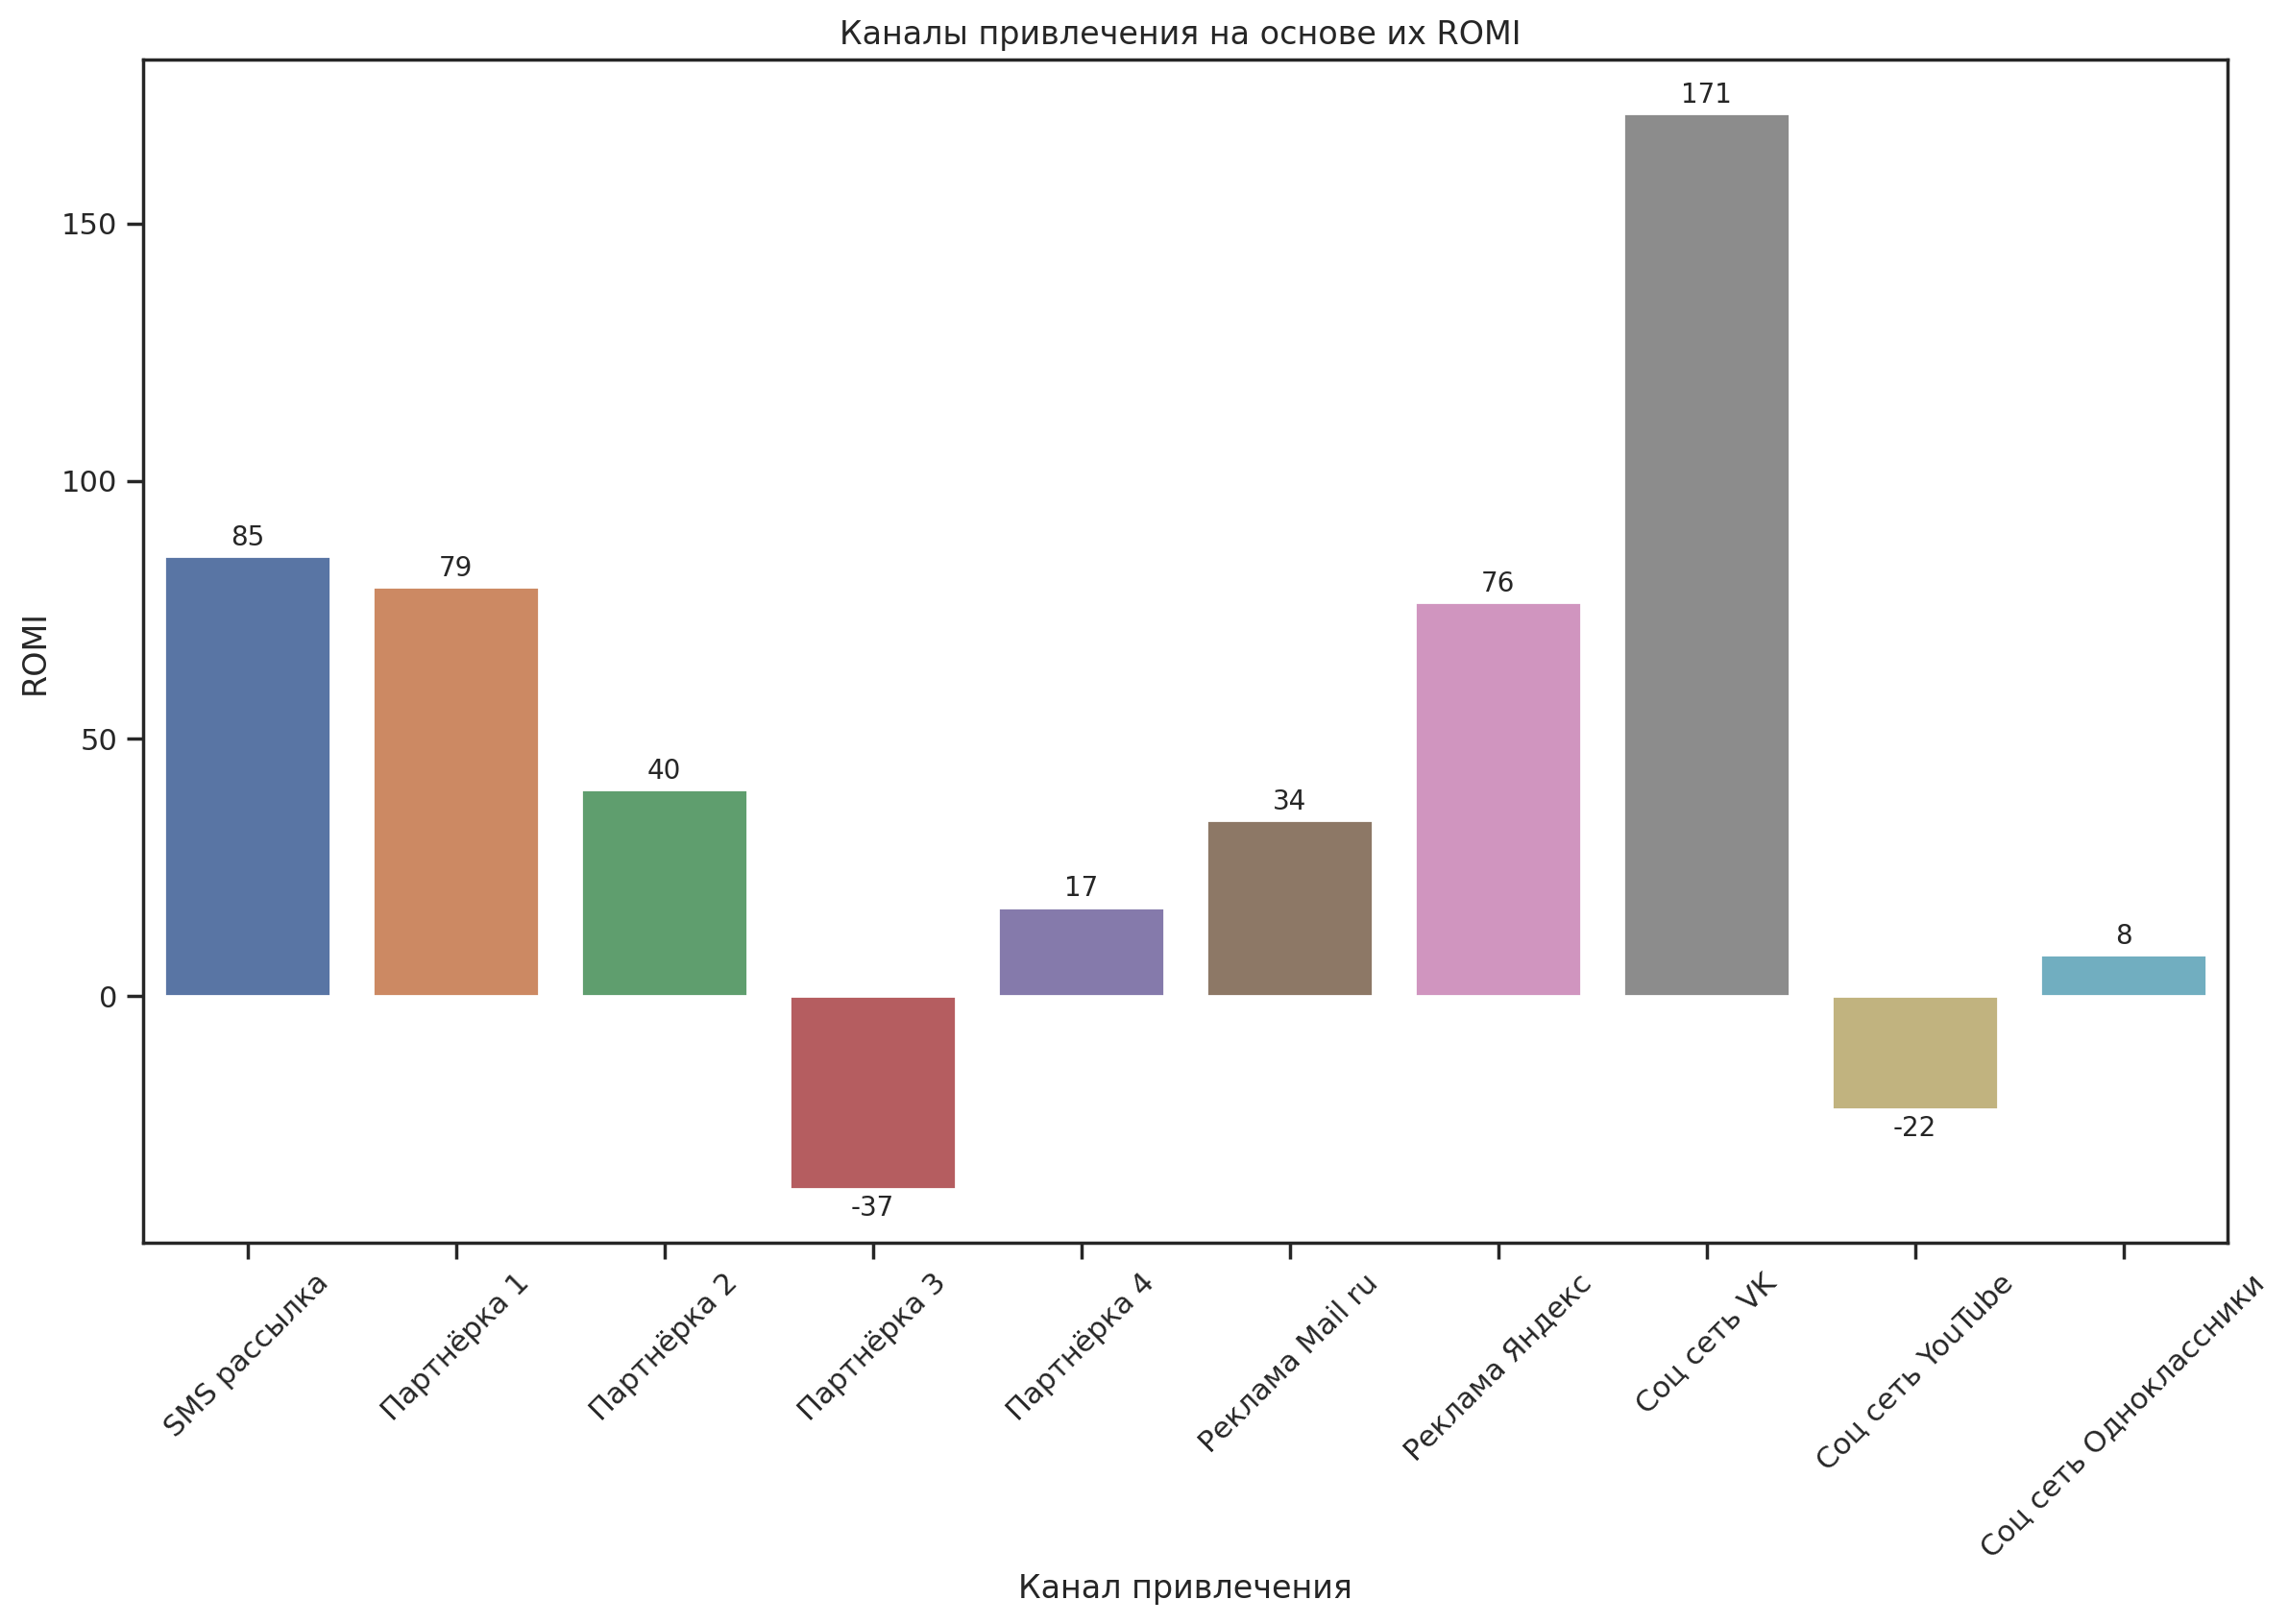

In [54]:
plt.figure(figsize=(14, 8))
plt.xlabel('Канал привлечения')
plt.ylabel('ROMI')
plt.title('Каналы привлечения на основе их ROMI ')
plt.xticks(rotation=45)
graph = sns.barplot(data=df6, x=df6['Канал привлечения'], y=df6["ROMI"], orient= 'v')
for c in graph.containers:
    graph.bar_label(c, padding = 2, fmt = '%.0f',fontsize = 10);


#### Посчитаем выручку и маржу по городам.

In [32]:
df3_c = df5[['Город', 'Выручка',"Маржа"]].groupby("Город").sum().sort_values(by="Выручка", ascending=False) \
            .reset_index()
df3_c


,Город,Выручка,Маржа
0,Волгоград,728270,179721.45
1,Новосибирск,721920,177692.25
2,Челябинск,649240,162209.95
3,Москва,622550,150600.95
4,Уфа,594490,153161.70
5,Самара,585260,138509.25
6,Омск,562130,140015.35
7,Ростов-на-Дону,544910,133916.70
8,Пермь,542290,128232.00
9,Красноярск,536160,124019.50


### График распределения выручки по городам.

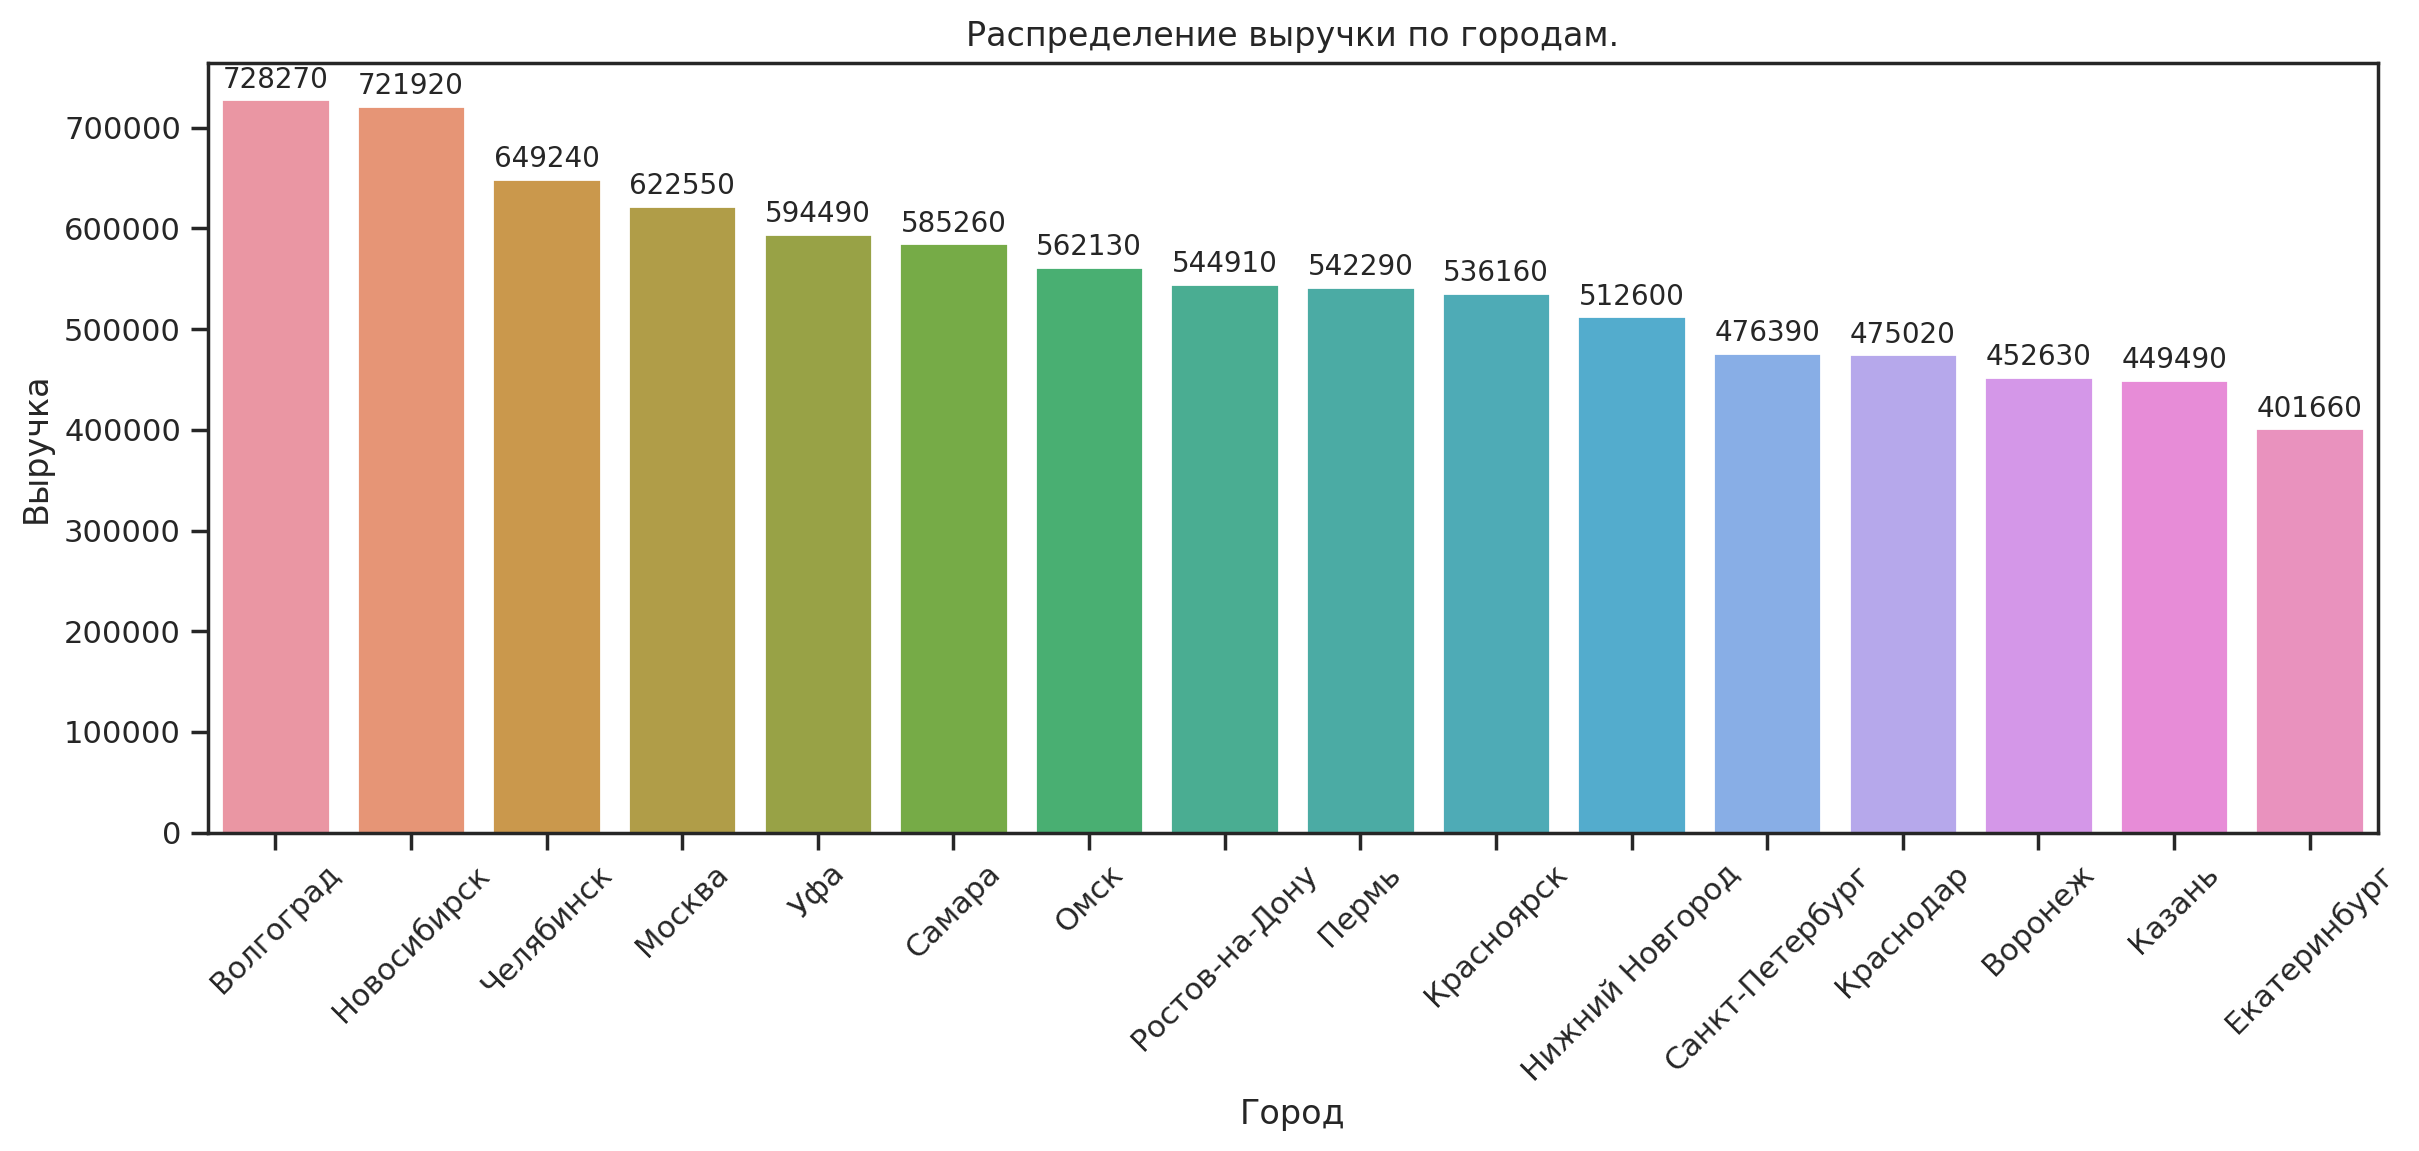

In [33]:
plt.figure(figsize=(14, 5))
plt.xlabel('Город')
plt.ylabel('Выручка')
plt.title('Распределение выручки по городам.')
plt.xticks(rotation=45)
graph = sns.barplot(data=df3_c, x=df3_c['Город'], y=df3_c["Выручка"], orient= 'v')
for c in graph.containers:
    graph.bar_label(c, padding = 2, fmt = '%.0f',fontsize = 10);


### График распределения маржи по городам.

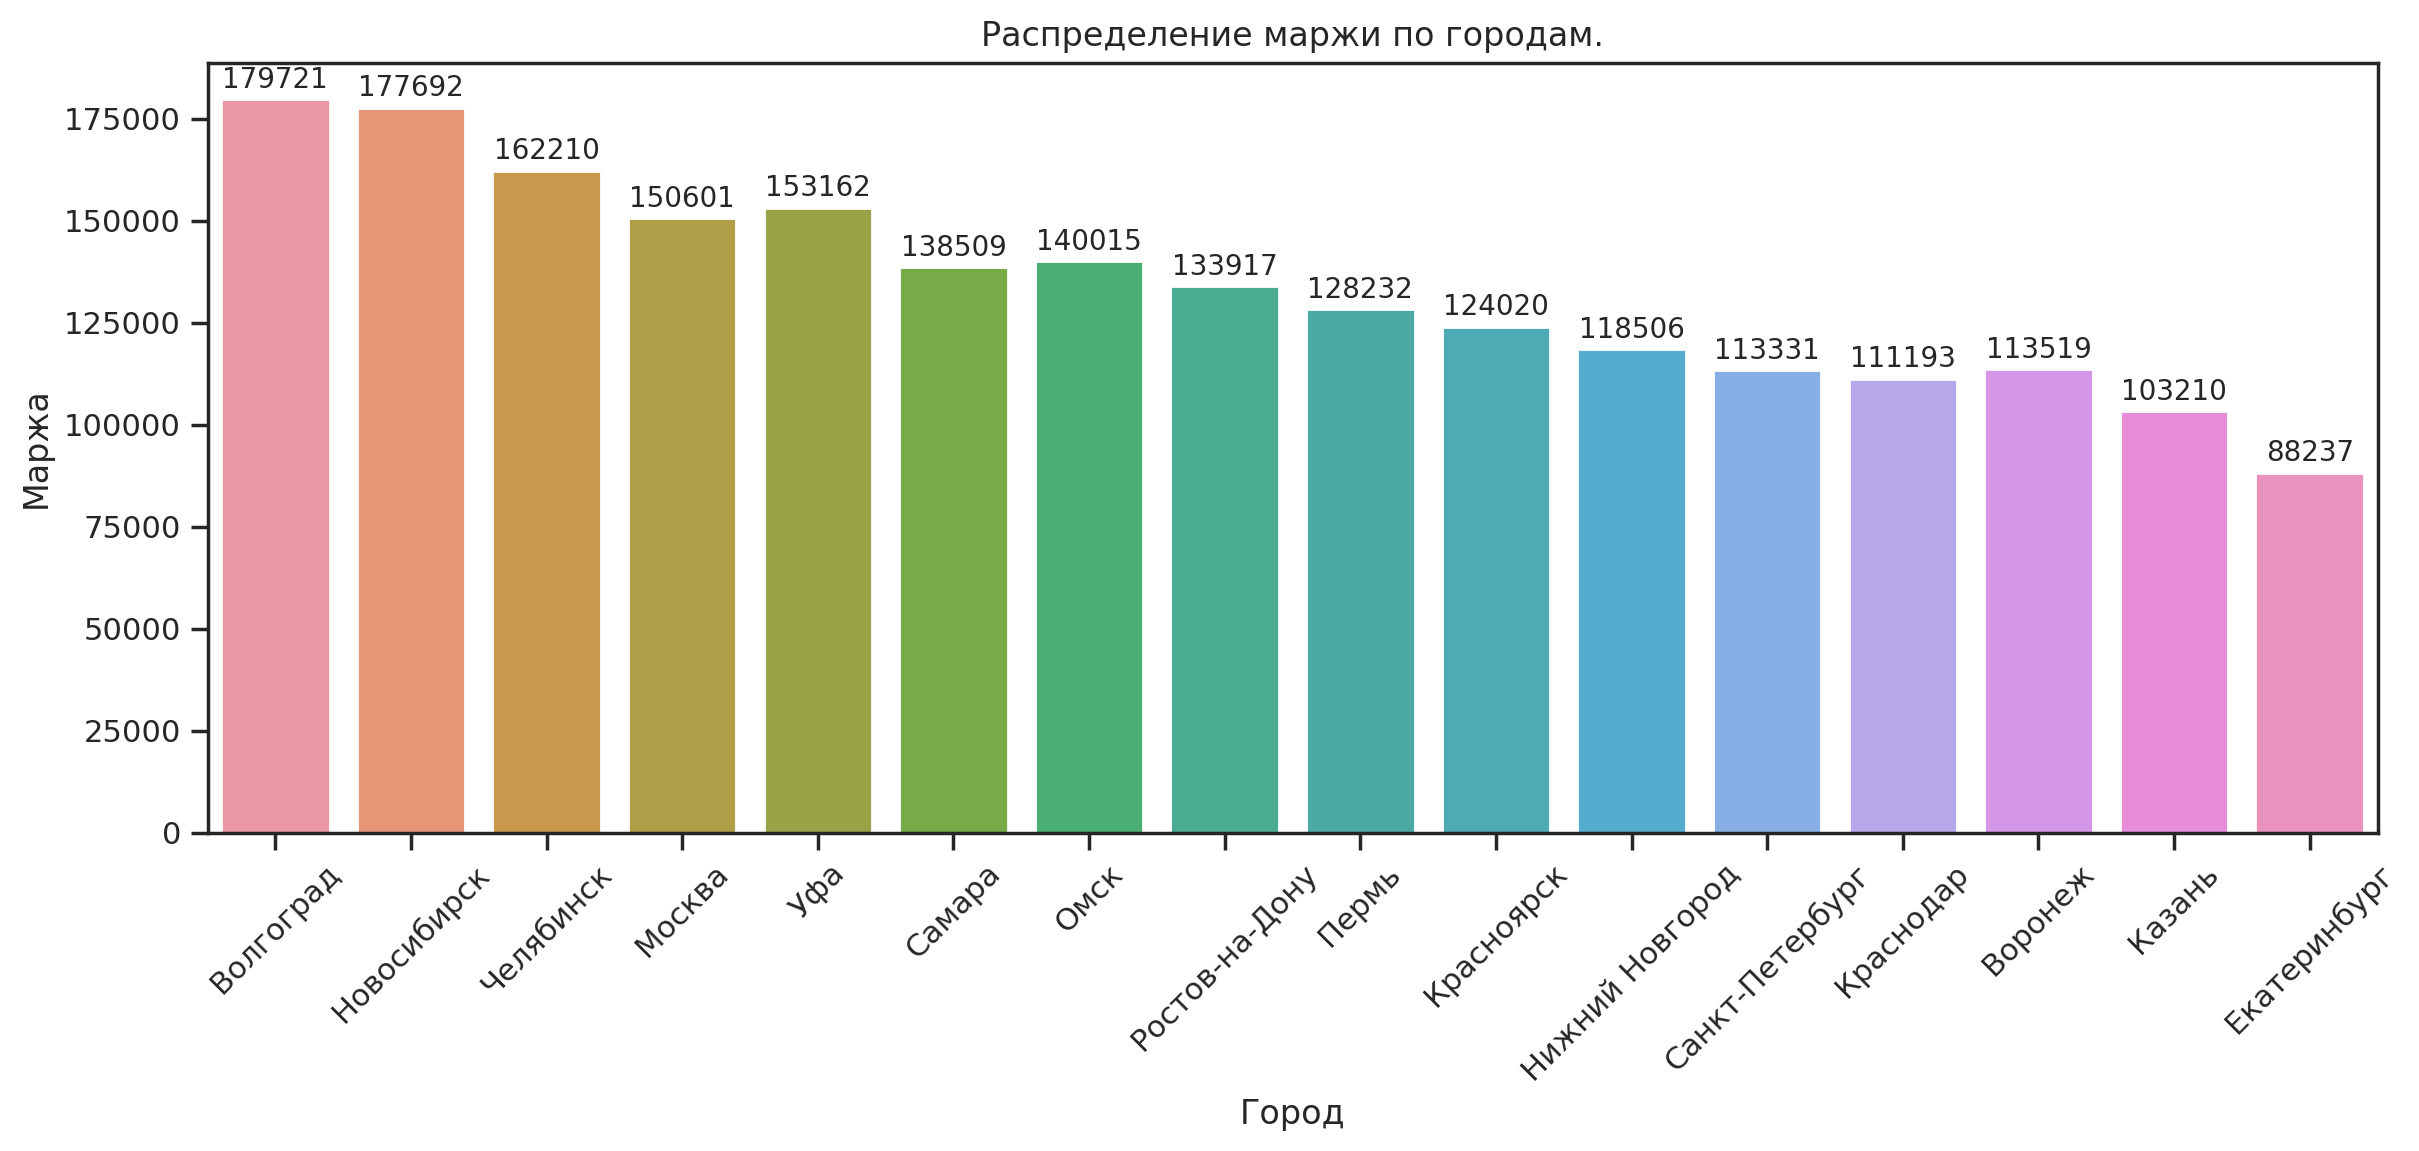

In [34]:
plt.figure(figsize=(14, 5))
plt.xlabel('Город')
plt.ylabel('Маржа')
plt.title('Распределение маржи по городам.')
plt.xticks(rotation=45)
graph = sns.barplot(data=df3_c, x=df3_c['Город'], y=df3_c["Маржа"], orient= 'v')
for c in graph.containers:
    graph.bar_label(c, padding = 2, fmt = '%.0f',fontsize = 10);
